1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]
The prediction is : 
 31.600046829881304


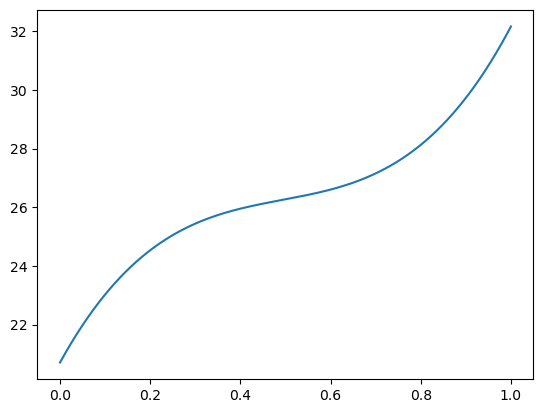

In [117]:
import numpy as np
import scipy as sp
from scipy import optimize,interpolate
from scipy.interpolate import UnivariateSpline,interp1d


max_speeds=np.load('max-speeds.npy')
print(max_speeds)
max_speeds=np.sort(max_speeds)
years_nb=max_speeds.shape[0]
cprob = np.arange(1, years_nb+1) / years_nb 
#plt.plot(yr,cprob)
quantile_spline = UnivariateSpline(cprob, max_speeds)
xx=np.linspace(0,1,1000)
yy=quantile_spline(xx)
plt.plot(xx,yy)
fifty_prob = 1. - 0.02
fifty_wind = quantile_spline(fifty_prob)
print('The prediction is : \n',fifty_wind)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Time offset from T_MAX fit: 
  7.123318930567864
Time offset from T_MIN fit: 
  -5.135561420871972


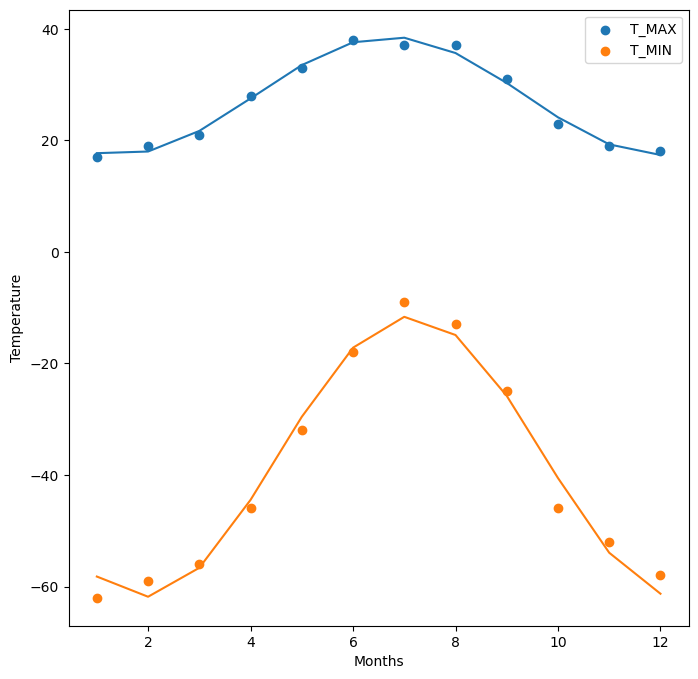

In [42]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%precision 4

month=['January','Febraury','March','April','May','June','July','August','September','October','November','December']
t_max=np.array([17,19,21,28,33,38,37,37,31,23,19,18])
t_min=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
num=np.arange(1,13)
fig, ax =  plt.subplots(figsize=[8,8])
ax.scatter(num,t_max,label='T_MAX')
ax.scatter(num,t_min,label='T_MIN')
ax.set_xlabel(xlabel='Months')
ax.set_ylabel(ylabel='Temperature')
ax.legend()

def f(x,A,omega,xoff,yoff):
     #return  np.exp(- ((x - mu)**2) / (sigma**2)) + yoff
        return A*np.cos(omega*x+xoff) + yoff
params_max,params_covariance_max=optimize.curve_fit(f,num,t_max,)    
params_min,params_covariance_min=optimize.curve_fit(f,num,t_min)

x=np.arange(1,13,1)
ax.plot(x,f(x,params_max[0],params_max[1],params_max[2],params_max[3]))
ax.plot(x,f(x,params_min[0],params_min[1],params_min[2],params_min[3]))
#help(optimize.curve_fit)
print('Time offset from T_MAX fit: \n ',params_max[2])
print('Time offset from T_MIN fit: \n ',params_min[2])
#here you can do a t-test
# the answer is yes, considering that -5 offset corresponds to a +7 offset in a T=12 period

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


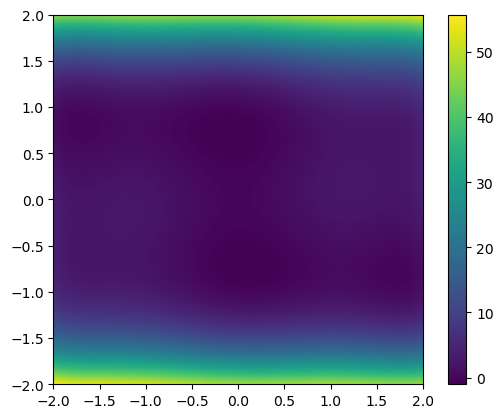

In [43]:
import pylab as plt
#help(plab.imshow)
x=np.linspace(-2,2,1000)
y=np.linspace(-2,2,1000)
X,Y=np.meshgrid(x,y)
Z=(4-2.1*X**2+X**4 /3)*X**2 +X*Y + (4*Y**2-4)*Y**2
plt.imshow(Z,extent=[-2, 2, -2, 2],origin='lower',cmap='viridis')
plt.colorbar()

In [57]:
#help(sp.optimize.minimize)
def f(v):
    X,Y=v
    return (4-2.1*X**2+X**4 /3)*X**2 +X*Y + (4*Y**2-4)*Y**2
%precision 6
bnds=[(-2,2),(-2,2)]
solutions=sp.optimize.minimize(f,(0,0),bounds=bnds)
print(solutions.x)
# in this way the solution is always zero

# let's try start from a random position between the bounds N time (N~100)
best_solutions=[]
for i in range(100):
    x0=np.random.uniform(-2,2)
    y0=np.random.uniform(-2,2)  
    sol = optimize.minimize(f, x0=(x0,y0))
    best_solutions.append(sol)

best_solutions.sort(key=lambda s:s.fun)
#for s in best_solutions:
    #print("The local minimum (x,y) is =", s.x, " the value of the function is =", s.fun)

print("The global minimum (x,y) is =", best_solutions[0].x, " the value of the function is =", best_solutions[0].fun) 
# it's not fully optimaze since there are actually more than one global minimum but the solutions aren't algebric
# another way is using Nelder-Mead method, this is more precise
solutions=sp.optimize.minimize(f,(0,0),bounds=bnds,method='Nelder-Mead')
print(solutions.x)

[0. 0.]
The global minimum (x,y) is = [ 0.089842 -0.712656]  the value of the function is = -1.031628453489877
[-0.089851  0.712665]


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

Lynx dominant period: 10.5 years
Hares dominant period: 10.5 years


Text(0.5, 1.0, 'PSD of hares population')

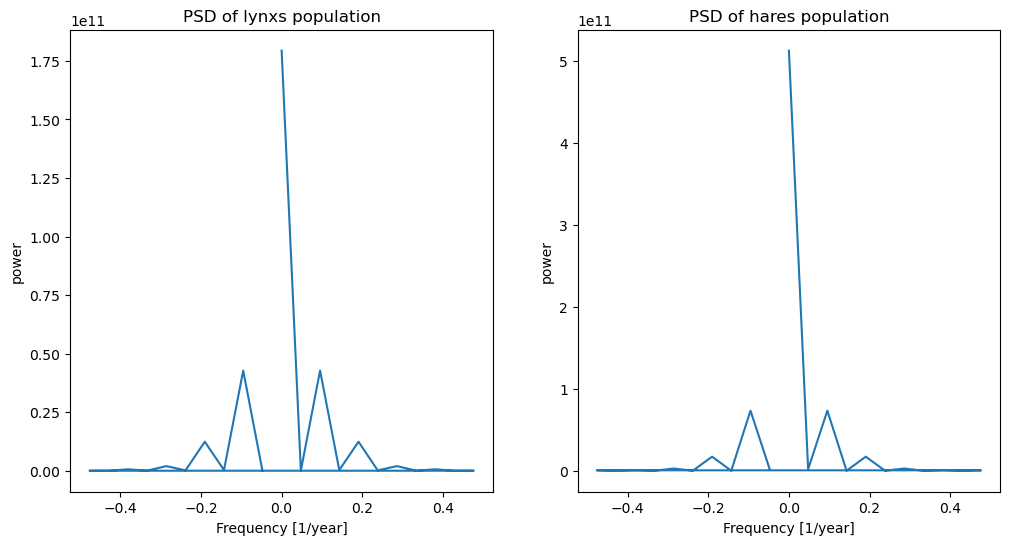

In [61]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import fftpack
import matplotlib.pyplot as plt

file_name='/home/turino/UNI/I/LCP/LaboratoryOfComputationalPhysics_Y8/populations.txt'
df=pd.read_table(file_name)
df.columns.values[0]='year' # i don't know why the first column appears as '#year'
t=df[:]['year']
t=t.to_numpy()
lynxs=df[:]['lynx'].to_numpy()
hares=df[:]['hare'].to_numpy()
#print(df)

lynxs_fft=fftpack.fft(lynxs)
lynxs_freq=fftpack.fftfreq(lynxs.size,d=1.)
lynxs_power=np.abs(lynxs_fft)**2

hares_fft=fftpack.fft(hares)
hares_freq=fftpack.fftfreq(hares.size,d=1.)
hares_power=np.abs(hares_fft)**2

# detecting the peaks
pos_mask = np.where(lynxs_freq > 0)
freqs = lynxs_freq[pos_mask]
lynxs_peak_freq = freqs[lynxs_power[pos_mask].argmax()]
print("Lynx dominant period:", 1/lynxs_peak_freq, "years")

pos_mask = np.where(hares_freq > 0)
freqs = hares_freq[pos_mask]
hares_peak_freq = freqs[hares_power[pos_mask].argmax()]
print("Hares dominant period:", 1/hares_peak_freq, "years")

# plot
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(11,6))
ax1.plot(lynxs_freq, lynxs_power)
ax1.set_xlabel('Frequency [1/year]')
ax1.set_ylabel('power')
ax1.set_title('PSD of lynxs population')
ax2.plot(hares_freq, hares_power)
ax2.set_xlabel('Frequency [1/year]')
ax2.set_ylabel('power')
ax2.set_title('PSD of hares population')
#the miniplot with the peak (as in the theory notebook) can also be represented
#also you can verify that the two periods are shifted by few years

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

11.748783
3.5246305


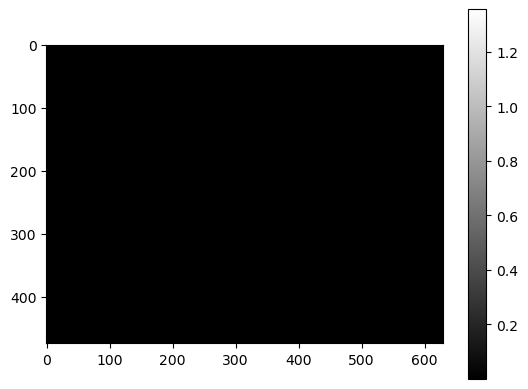

In [170]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import fftpack
import matplotlib.pyplot as plt
import pylab as plab

filename='/home/turino/UNI/I/LCP/LaboratoryOfComputationalPhysics_Y8/moonlanding.png'
img=plab.imread(fname=filename)
#plt.imshow(img) # the noisy image
#plt.colorbar()
nrows,ncols=img.shape
#help(fftpack.fft2)
img_fft=fftpack.fft2(img,shape=[nrows,ncols])
img_power_shift=fftpack.fftshift(img_fft)
img_power_shift=np.log(np.abs(img_power_shift)+1)


freq_r = fftpack.fftshift(fftpack.fftfreq(nrows, d=1.0))
freq_c = fftpack.fftshift(fftpack.fftfreq(ncols, d=1.0))
#help(fftpack.fftshift)
print(img_power_shift.max())

#plt.imshow(img_power_shift)
#plt.colorbar()

## let's try modify the spectrum
threshold=img_power_shift.max()
peak_positions=np.argwhere((img_power_shift<=threshold) & (img_power_shift> 0.3*threshold))
#print(peak_positions)
img_power_shift[peak_positions[:,0],peak_positions[:,1]]=0
print(img_power_shift.max())
#plt.imshow(np.abs(img_power_shift))
#plt.colorbar()
img_filtered=fftpack.ifft2(img_power_shift,shape=[nrows,ncols])
plt.imshow(np.abs(img_filtered),cmap='gray')
plt.colorbar()

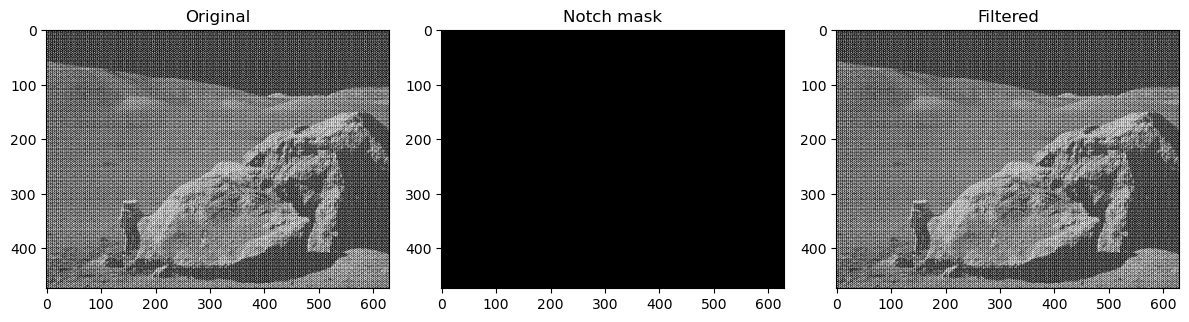

In [209]:
import numpy as np
import matplotlib.pyplot as plt

filename='/home/turino/UNI/I/LCP/LaboratoryOfComputationalPhysics_Y8/moonlanding.png'
img = plt.imread(filename)

# grayscale
if img.ndim == 3:
    img = img.mean(axis=2)

img = img.astype(float)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

# FFT
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)
power = np.abs(Fshift)

# ---- detect strong frequency peaks ----
threshold = 0.7 * power.max()
peaks = np.argwhere(power > threshold)

# remove DC center from peak list
peaks = [(r,c) for (r,c) in peaks if not (abs(r-crow)<5 and abs(c-ccol)<5)]

# ---- build notch mask ----
mask = np.ones_like(img)

Y, X = np.ogrid[:rows, :cols]
radius = 6   # notch size

for (r,c) in peaks:
    dist2 = (X-c)**2 + (Y-r)**2
    mask[dist2 < radius**2] = 0

# ---- filter ----
F_filtered = Fshift * mask
img_filtered = np.fft.ifft2(np.fft.ifftshift(F_filtered))
img_filtered = np.real(img_filtered)

# ---- show result ----
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(mask, cmap='gray'); plt.title("Notch mask")
plt.subplot(1,3,3); plt.imshow(img_filtered, cmap='gray'); plt.title("Filtered")
plt.tight_layout(); plt.show()


Text(0.5, 1.0, 'Filtered image')

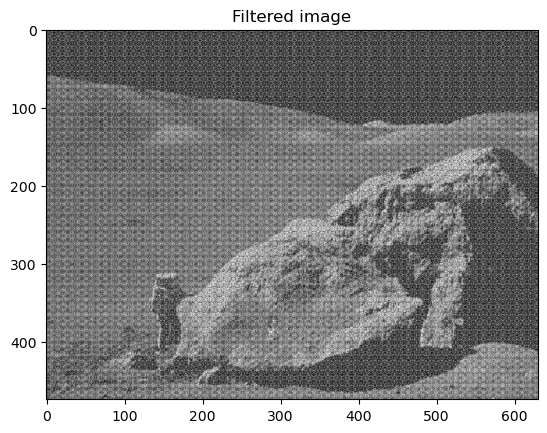

In [208]:
plt.imshow(img_filtered, cmap='gray')
plt.title("Filtered image")

Text(0.5, 1.0, 'Original noisy image')

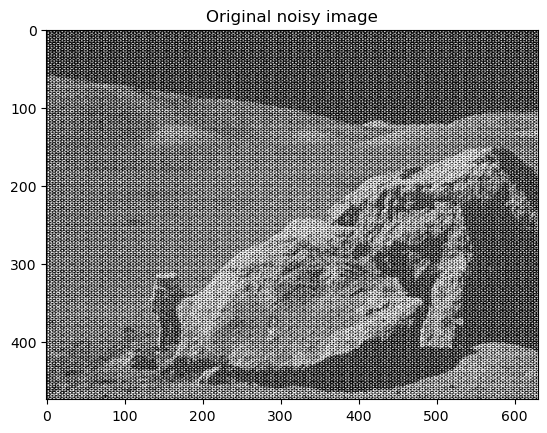

In [204]:
plt.imshow(img, cmap='gray')
plt.title("Original noisy image")